In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\Avinash\Desktop\Projects\P1=WorldHappiness\happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.shape

(158, 12)

In [4]:
df.describe

<bound method NDFrame.describe of          Country                           Region  Happiness Rank  \
0    Switzerland                   Western Europe               1   
1        Iceland                   Western Europe               2   
2        Denmark                   Western Europe               3   
3         Norway                   Western Europe               4   
4         Canada                    North America               5   
..           ...                              ...             ...   
153       Rwanda               Sub-Saharan Africa             154   
154        Benin               Sub-Saharan Africa             155   
155        Syria  Middle East and Northern Africa             156   
156      Burundi               Sub-Saharan Africa             157   
157         Togo               Sub-Saharan Africa             158   

     Happiness Score  Standard Error  Economy (GDP per Capita)   Family  \
0              7.587         0.03411                   1.39651

We have 158 rows and 12 columns

In [5]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [6]:
df['Happiness Score']

0      7.587
1      7.561
2      7.527
3      7.522
4      7.427
       ...  
153    3.465
154    3.340
155    3.006
156    2.905
157    2.839
Name: Happiness Score, Length: 158, dtype: float64

So as we can see "Happiness score"  is not a Discrete set of classes but a continious rows of float values.So, we can safely say that this is a regression problem .

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

So luckly there is no null data in our dataset

Now ,we first drop rankand Country from our data frame as it does not really tell us anything important in the model itself

In [8]:
df = df.drop("Happiness Rank",axis=1)

In [9]:
df = df.drop("Country",axis=1)

In [10]:
df = df.rename(columns = {'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health','Trust (Government Corruption)': 'Trust'}, inplace = False)

In [11]:
df.head()

,Region,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Western Europe,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# UNI VARIANT ANALYSIS

In [12]:
colname=[]
for i in df.columns:
    colname.append(i)

<AxesSubplot:xlabel='Happiness Score', ylabel='Density'>

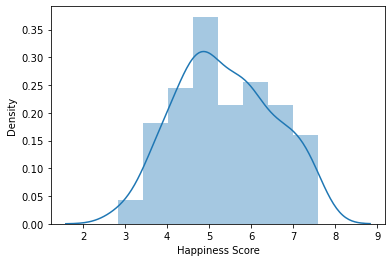

In [13]:
sn.distplot(df[colname[1]])

As the Bell curve is distorted in the right side so there must be some amount of outliers and little skewness

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

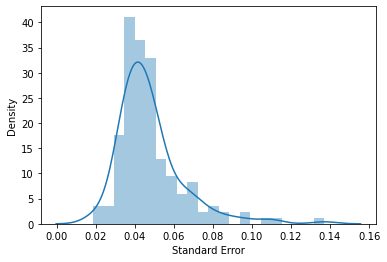

In [14]:
sn.distplot(df[colname[2]])

This is a Right sekwed(positively skewed) curve

<AxesSubplot:xlabel='Economy', ylabel='Density'>

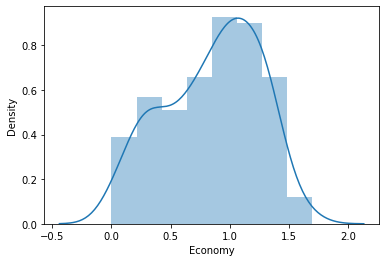

In [15]:
sn.distplot(df[colname[3]])

As the Bell curve is distorted in the left side so there must be some amount of outliers and skewness

<AxesSubplot:xlabel='Family', ylabel='Density'>

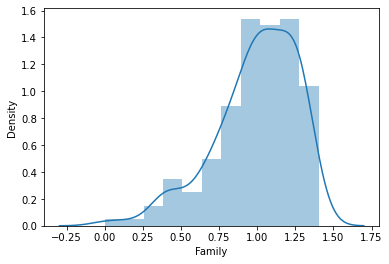

In [16]:
sn.distplot(df[colname[4]])

This plot is slightly distorted and has left skewed(negetive skewed) properties

<AxesSubplot:xlabel='Health', ylabel='Density'>

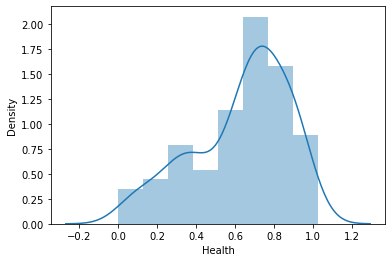

In [17]:
sn.distplot(df[colname[5]])

This plot is slightly distorted and has left skewed(negetive skewed) properties

<AxesSubplot:xlabel='Freedom', ylabel='Density'>

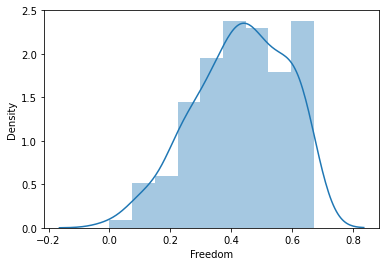

In [18]:
sn.distplot(df[colname[6]])

This plot is slightly distorted and has left skewed(negetive skewed) properties

<AxesSubplot:xlabel='Trust', ylabel='Density'>

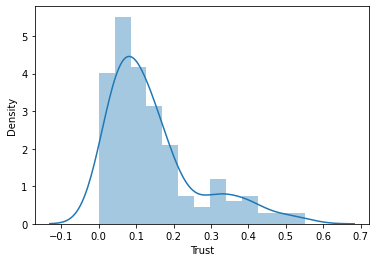

In [19]:
sn.distplot(df[colname[7]])

This plot is slightly distorted and has right skewed(positive skewed) properties

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

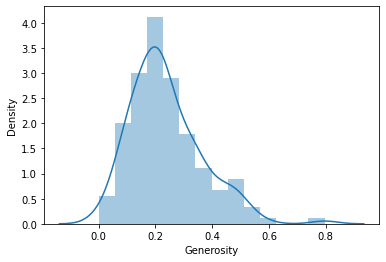

In [20]:
sn.distplot(df[colname[8]])

It is almost a good bell curve with some outliers and some skewness

<AxesSubplot:xlabel='Dystopia Residual', ylabel='Density'>

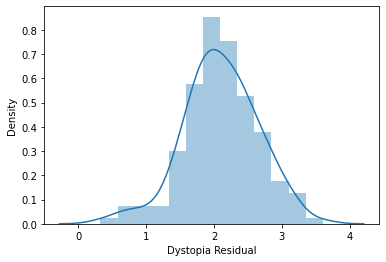

In [21]:
sn.distplot(df[colname[9]])

It is almost a good bell curve with some outliers and some skewness

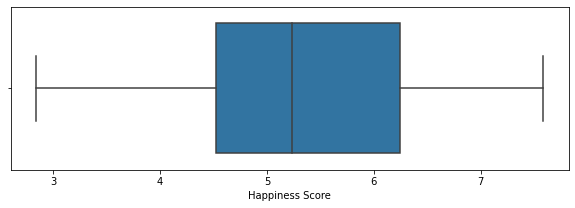

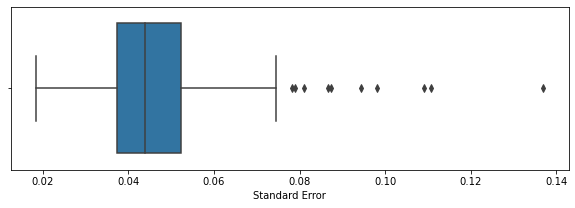

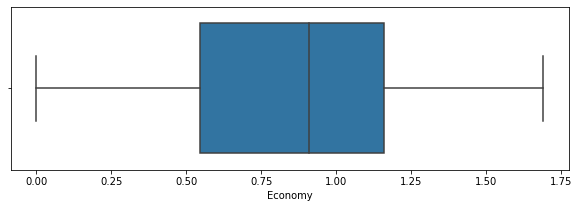

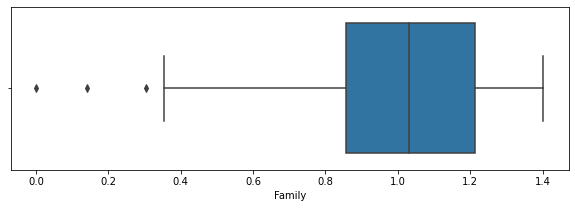

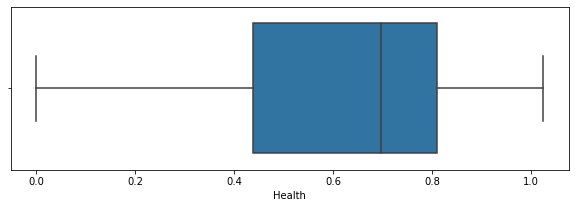

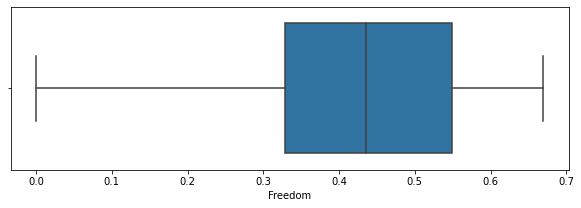

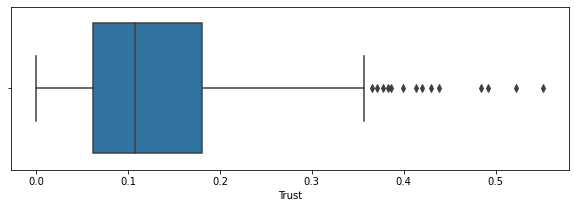

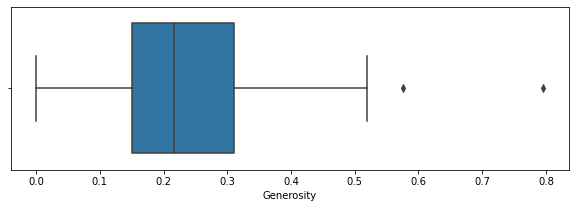

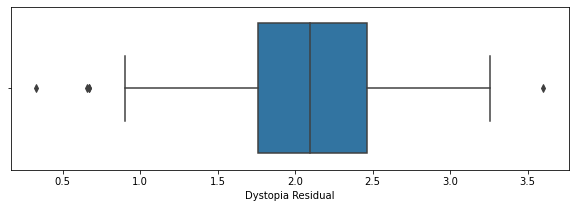

In [22]:
df1=df.select_dtypes(exclude=['object'])

for column in df1:
        plt.figure(figsize=(10,3))
        sn.boxplot(data=df1, x=column)

standard error,family,trust,genrosity,Dystopia residual have some outliers

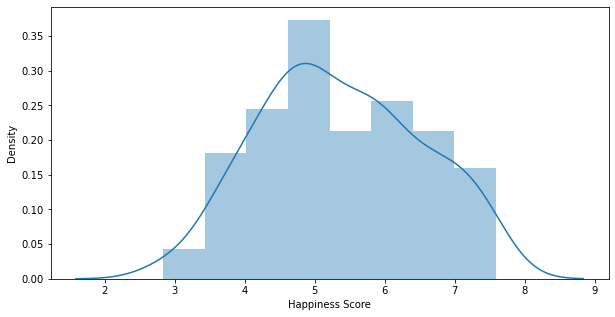

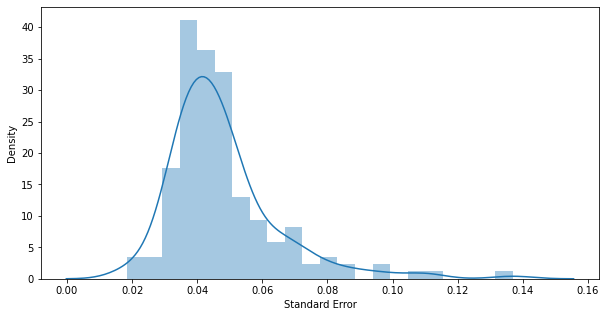

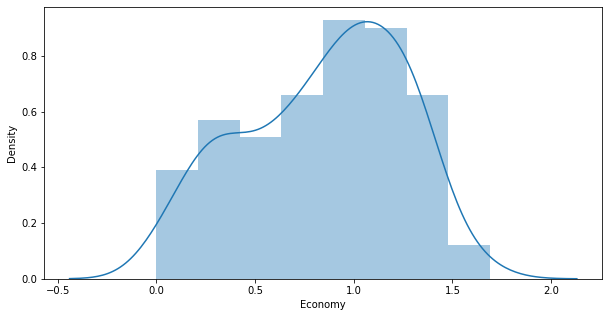

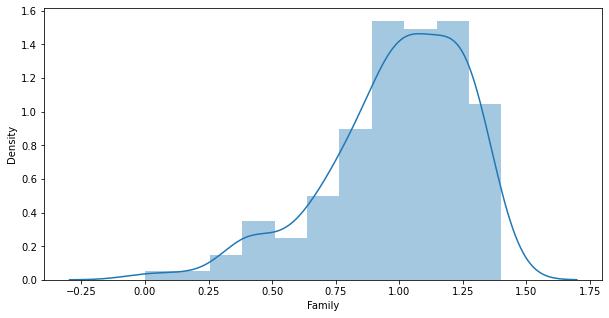

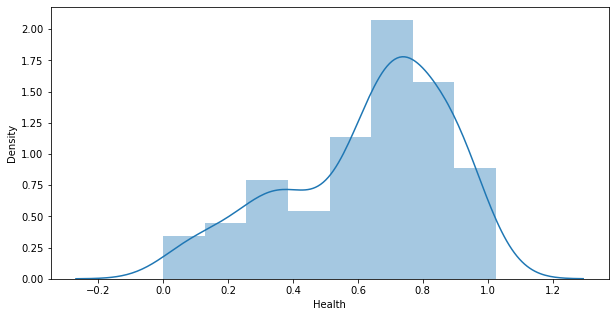

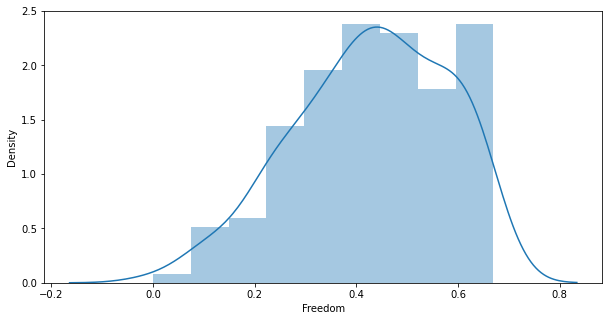

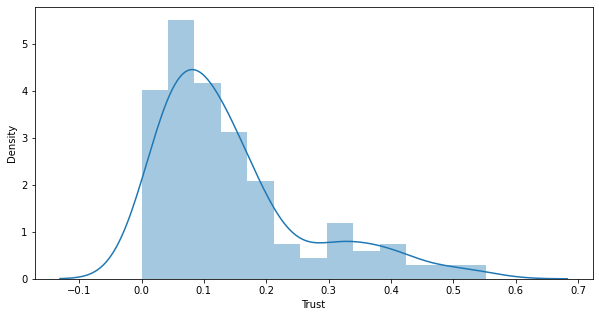

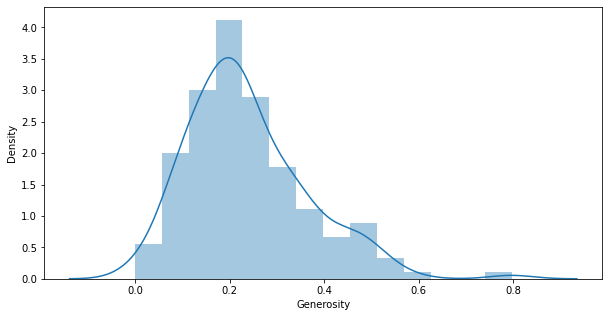

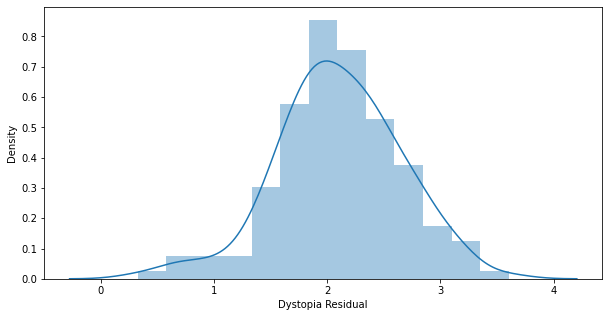

In [23]:
for column in df1:
        plt.figure(figsize=(10,5))
        sn.distplot(df1[column])

# BI VARIANT ANALYSIS

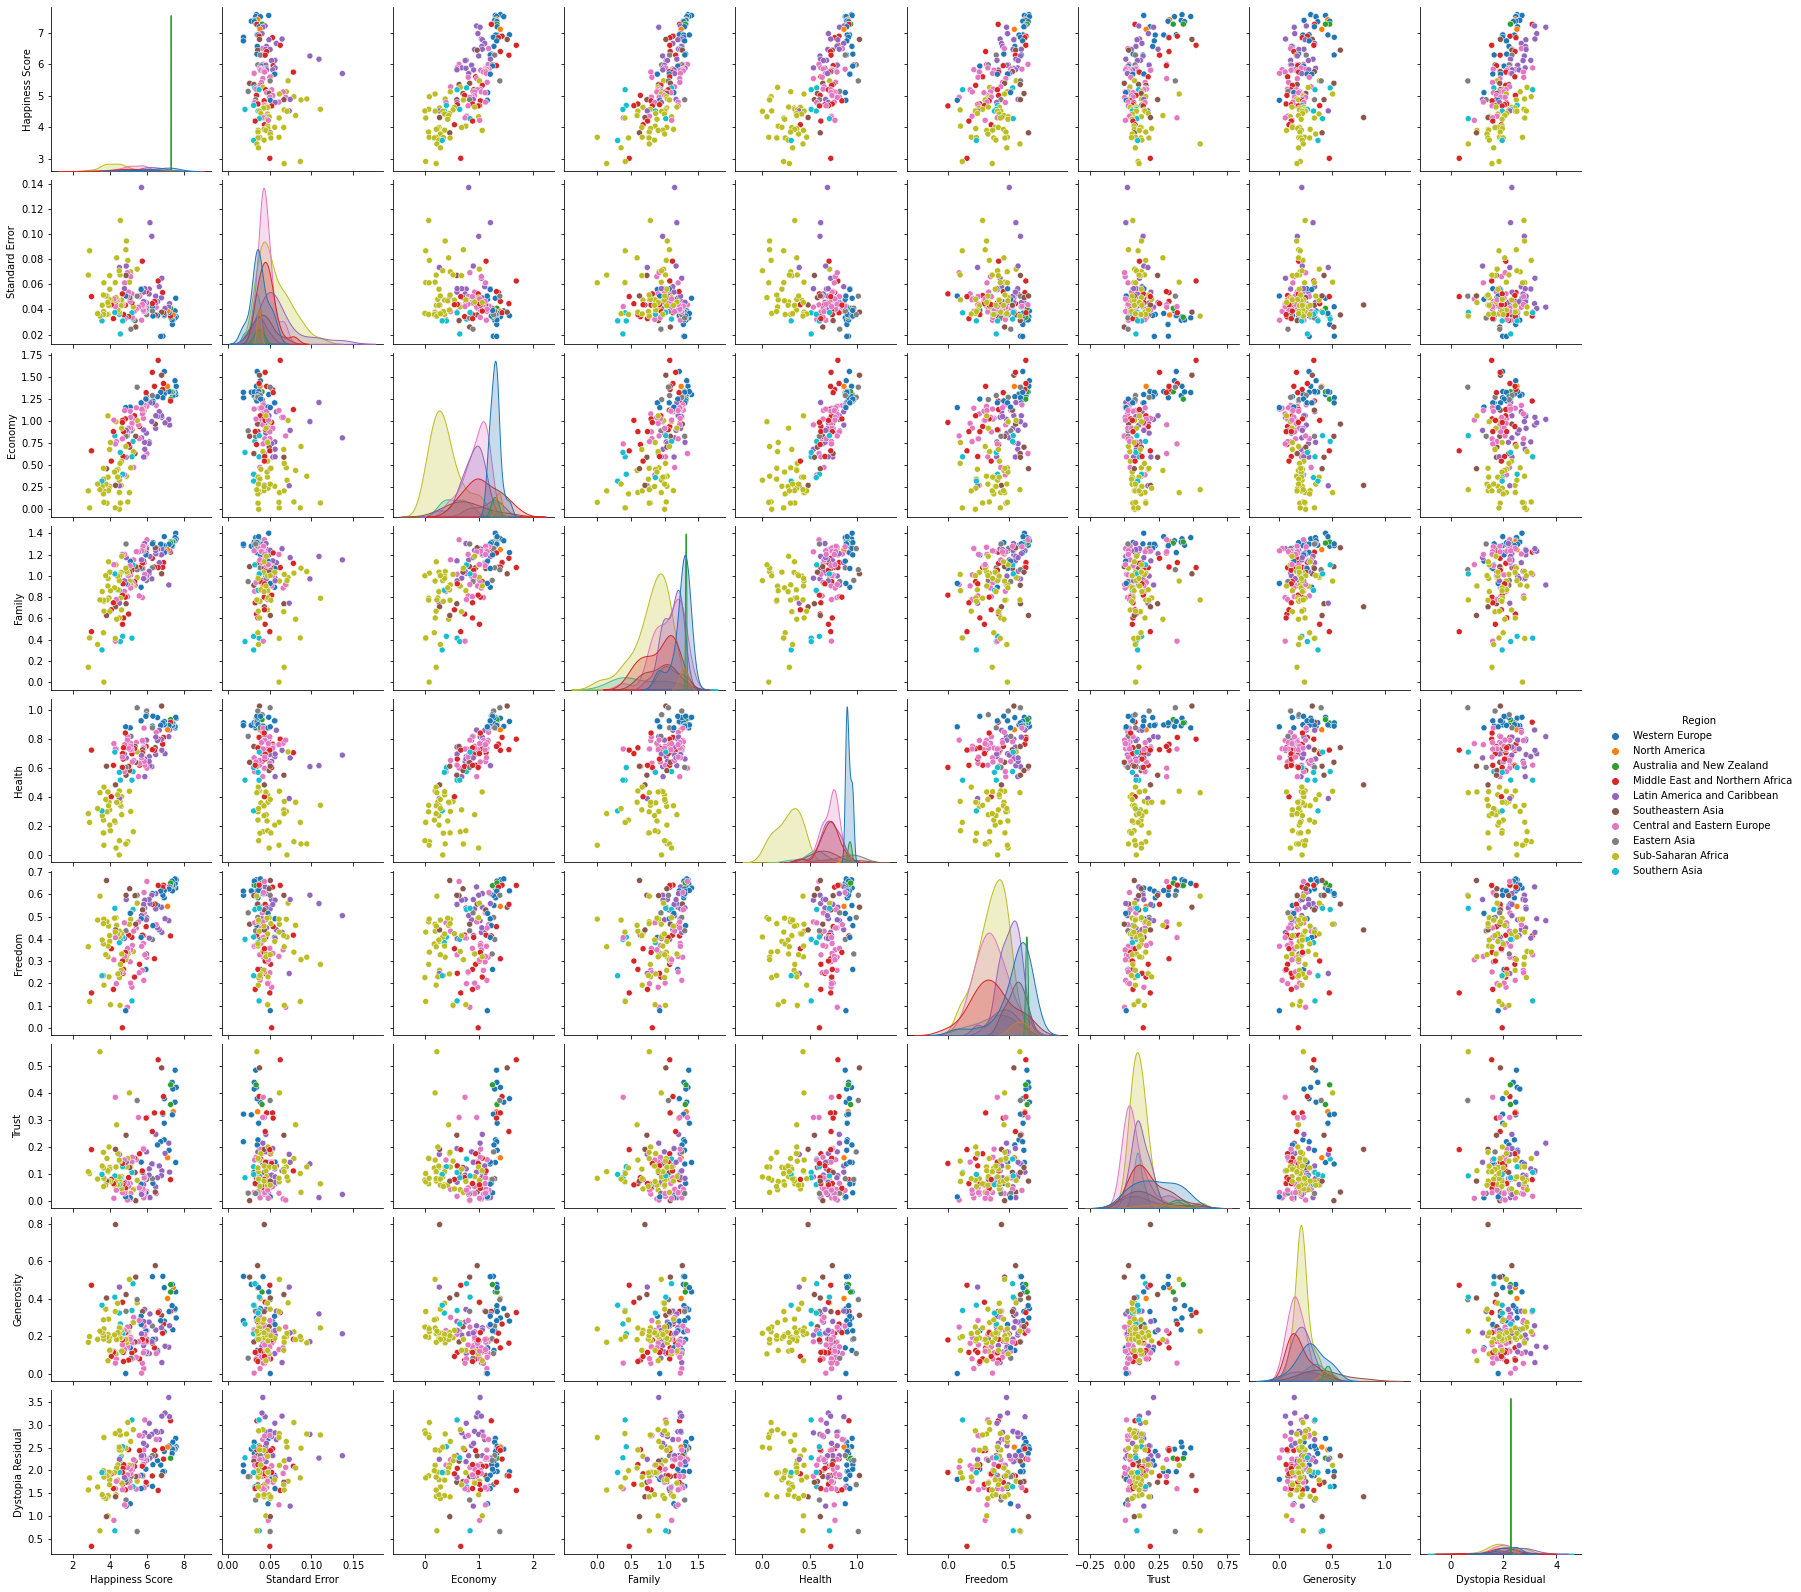

In [24]:
f=sn.pairplot(df,hue="Region")
#plt.savefig(r"C:\Users\Avinash\Desktop\Projects\P1=WorldHappiness\pairplot.png")

In [25]:
cor=df.corr()

In [26]:
cor

,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

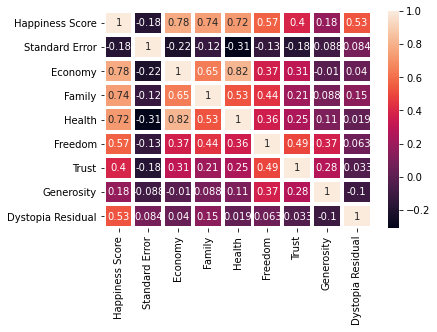

In [27]:
sn.heatmap(cor,annot=True,linewidths='3')

# Removing Outlier

In [28]:
from scipy.stats import zscore

In [29]:
z=np.abs(zscore(df1))
new_df=df[(z<3).all(axis=1)]

In [30]:
new_df.shape

(149, 10)

We have lost 9 rows

In [31]:
datalossperc=((158-149)/158)*100
datalossperc

5.69620253164557

So our dataloss is less than 7%

# Skewness

In [32]:
new_df.skew()

Happiness Score      0.169740
Standard Error       1.243048
Economy             -0.390657
Family              -0.811340
Health              -0.747711
Freedom             -0.400867
Trust                1.272530
Generosity           0.654710
Dystopia Residual   -0.021144
dtype: float64

As our acceptable range for skewness is +-0.5.standard error,family,health,trust,generocity has high skewness.So we have to remove it.

# Skewness Removal

# 1:Standard error

In [33]:
se=np.log10(new_df["Standard Error"])

In [34]:
se.skew()

0.1232204313256381

In [35]:
new_df["Standard Error"]=se

<AxesSubplot:>

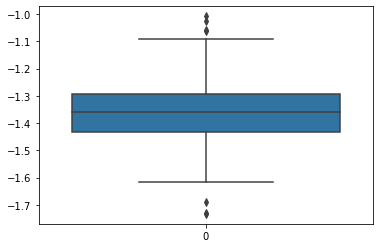

In [36]:
sn.boxplot(data=new_df["Standard Error"])

<AxesSubplot:xlabel='Standard Error', ylabel='Density'>

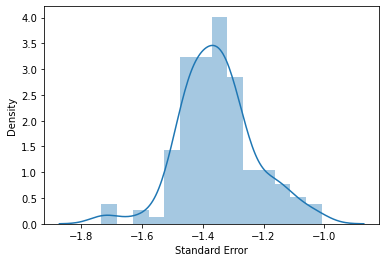

In [37]:
sn.distplot(new_df["Standard Error"])

Now data is almost normally distributed

# 2:Family

In [38]:
from scipy.stats import boxcox

In [39]:
f=boxcox(new_df["Family"])[0]

In [40]:
pd.Series(f).skew()

-0.21517805498769374

In [41]:
new_df["Family"]=f

In [42]:
new_df["Family"].head()

0    0.414133
1    0.487886
2    0.429373
3    0.388876
4    0.377646
Name: Family, dtype: float64

<AxesSubplot:>

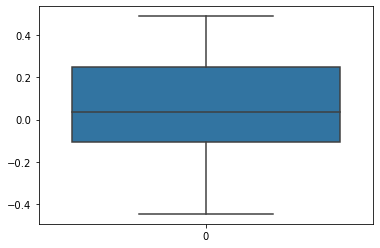

In [43]:
sn.boxplot(data=new_df["Family"])

<AxesSubplot:xlabel='Family', ylabel='Density'>

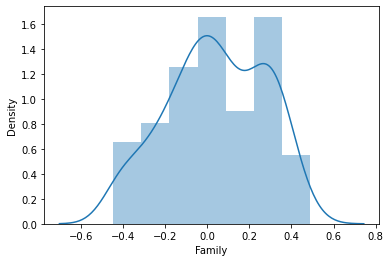

In [44]:
sn.distplot(new_df["Family"])

Now data is almost normally distributed

# Trust

In [45]:
t=np.sqrt(new_df["Trust"])

In [46]:
t

0      0.647904
1      0.376098
2      0.695392
3      0.604177
4      0.574082
         ...   
150    0.423344
151    0.358218
152    0.311753
154    0.283019
156    0.317207
Name: Trust, Length: 149, dtype: float64

In [47]:
t.skew()

0.437253236061777

In [48]:
new_df["Trust"]=t

In [49]:
new_df["Trust"].head()

0    0.647904
1    0.376098
2    0.695392
3    0.604177
4    0.574082
Name: Trust, dtype: float64

<AxesSubplot:>

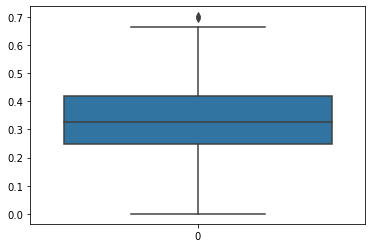

In [50]:
sn.boxplot(data=new_df["Trust"])

<AxesSubplot:xlabel='Trust', ylabel='Density'>

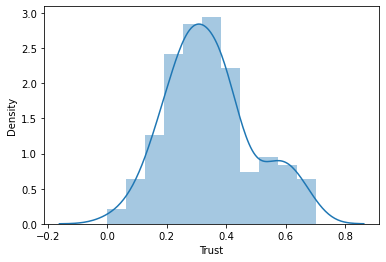

In [51]:
sn.distplot(new_df["Trust"])

# Health

In [52]:
he=new_df["Health"]

In [53]:
he[122]=0.5674

In [54]:
new_df["Health"]=he

In [55]:
h=boxcox(new_df["Health"])[0]

In [56]:
pd.Series(h).skew()

-0.3678015577785943

In [57]:
new_df["Health"]=h

In [58]:
new_df["Health"].head()

0   -0.057748
1   -0.051509
2   -0.121548
3   -0.111600
4   -0.092222
Name: Health, dtype: float64

<AxesSubplot:>

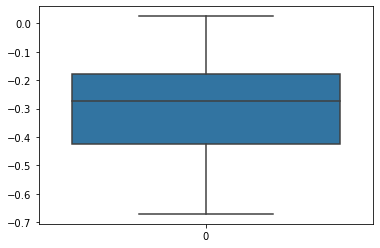

In [59]:
sn.boxplot(data=new_df["Health"])

<AxesSubplot:xlabel='Health', ylabel='Density'>

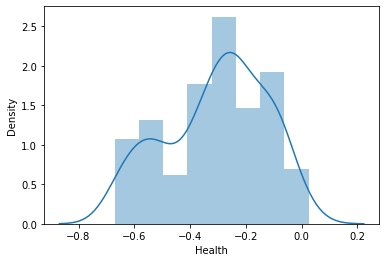

In [60]:
sn.distplot(new_df["Health"])

# Generosity

In [61]:
g=np.sqrt(new_df["Generosity"])

In [62]:
g.skew()

-0.2857985130797846

In [63]:
new_df["Generosity"]=g

<AxesSubplot:>

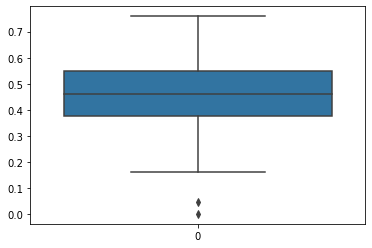

In [64]:
sn.boxplot(data=new_df["Generosity"])

<AxesSubplot:xlabel='Generosity', ylabel='Density'>

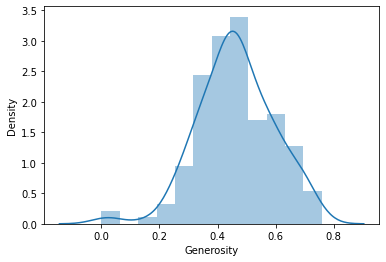

In [65]:
sn.distplot(new_df["Generosity"])

In [66]:
new_df

,Region,Happiness Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,Western Europe,7.587,-1.467118,1.39651,0.414133,-0.057748,0.66557,0.647904,0.544775,2.51738
1,Western Europe,7.561,-1.311224,1.30232,0.487886,-0.051509,0.62877,0.376098,0.660530,2.70201
2,Western Europe,7.527,-1.477817,1.32548,0.429373,-0.121548,0.64938,0.695392,0.584286,2.49204
3,Western Europe,7.522,-1.411168,1.45900,0.388876,-0.111600,0.66973,0.604177,0.589059,2.46531
4,North America,7.427,-1.449405,1.32629,0.377646,-0.092222,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...,...,...
150,Sub-Saharan Africa,3.655,-1.288952,0.46534,-0.201415,-0.636180,0.46866,0.423344,0.449055,1.41723
151,Sub-Saharan Africa,3.587,-1.364114,0.25812,-0.136609,-0.579213,0.39493,0.358218,0.466337,1.46494
152,Southern Asia,3.575,-1.510886,0.31982,-0.445305,-0.561448,0.23414,0.311753,0.604235,1.95210
154,Sub-Saharan Africa,3.340,-1.436994,0.28665,-0.429500,-0.552393,0.48450,0.283019,0.427317,1.63328


# Seperating Target and other Variable

In [67]:
x=new_df.drop(["Happiness Score","Region"],axis=1)

In [68]:
y=new_df[["Happiness Score"]].copy()

In [69]:
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
150,3.655
151,3.587
152,3.575
154,3.340


In [70]:
x

,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,-1.467118,1.39651,0.414133,-0.057748,0.66557,0.647904,0.544775,2.51738
1,-1.311224,1.30232,0.487886,-0.051509,0.62877,0.376098,0.660530,2.70201
2,-1.477817,1.32548,0.429373,-0.121548,0.64938,0.695392,0.584286,2.49204
3,-1.411168,1.45900,0.388876,-0.111600,0.66973,0.604177,0.589059,2.46531
4,-1.449405,1.32629,0.377646,-0.092222,0.63297,0.574082,0.676838,2.45176
...,...,...,...,...,...,...,...,...
150,-1.288952,0.46534,-0.201415,-0.636180,0.46866,0.423344,0.449055,1.41723
151,-1.364114,0.25812,-0.136609,-0.579213,0.39493,0.358218,0.466337,1.46494
152,-1.510886,0.31982,-0.445305,-0.561448,0.23414,0.311753,0.604235,1.95210
154,-1.436994,0.28665,-0.429500,-0.552393,0.48450,0.283019,0.427317,1.63328


# Now we scale our independent variables

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [73]:
x

,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,0.367139,0.892961,0.920968,0.880544,0.993789,0.923601,0.717617,0.632017
1,0.582162,0.832733,1.000000,0.889507,0.938841,0.536136,0.870098,0.694649
2,0.352383,0.847542,0.937298,0.788885,0.969615,0.991295,0.769664,0.623420
3,0.444310,0.932918,0.893902,0.803177,1.000000,0.861267,0.775951,0.614353
4,0.391571,0.848060,0.881869,0.831016,0.945112,0.818365,0.891581,0.609756
...,...,...,...,...,...,...,...,...
144,0.612881,0.297549,0.261351,0.049533,0.699775,0.603485,0.591527,0.258812
145,0.509211,0.165048,0.330796,0.131375,0.589685,0.510647,0.614293,0.274997
146,0.306771,0.204500,0.000000,0.156898,0.349604,0.444410,0.795942,0.440256
147,0.408689,0.183291,0.016937,0.169906,0.723426,0.403450,0.562893,0.332103


# Splitting the data between train and test

In [74]:
from sklearn.model_selection import train_test_split

In [90]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,train_size=0.70,random_state=343)

We are taking 0.7 beacuse we have very few rows .So, to get a good results the train size is a little high

# Training Models

In [293]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import accuracy_score

In [239]:
ms=[]

# Linear Regression

In [91]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [296]:
temp=model.score(X_test,Y_test)
ms.append(temp)
print(f'Regression R2:{temp}')

Regression R2:0.9881923896348284


# DesitionTreeRegression

In [93]:
model2=DecisionTreeRegressor()
model2.fit(X_train,Y_train)

DecisionTreeRegressor()

In [241]:
temp=model2.score(X_test,Y_test)
ms.append(temp)
print(f'DesitionTreeRegressor Score:{temp}')

DesitionTreeRegressor Score:0.6669853219333413


# Ridge Ression

In [217]:
model3=Ridge()
model3.fit(X_train,Y_train)

Ridge()

In [242]:
temp=model3.score(X_test,Y_test)
ms.append(temp)
print(f'Ridge Score:{temp}')

Ridge Score:0.9730708412802914


# Lasso Regression

In [97]:
model4=Lasso()
model4.fit(X_train,Y_train)

Lasso()

In [243]:
temp=model4.score(X_test,Y_test)
ms.append(temp)
print(f'Lasso Score:{temp}')

Lasso Score:-0.02834755299079883


# Random Forest

In [99]:
model5=RandomForestRegressor()
model5.fit(X_train,Y_train)

RandomForestRegressor()

In [244]:
temp=model5.score(X_test,Y_test)
ms.append(temp)
print(f'RandomForest Score:{temp}')

RandomForest Score:0.8362053904394315


# KNN

In [101]:
model6=KNeighborsRegressor()
model6.fit(X_train,Y_train)

KNeighborsRegressor()

In [245]:
temp=model5.score(X_test,Y_test)
ms.append(temp)
print(f'KNN Score:{temp}')

KNN Score:0.8362053904394315


# Now Calculating the Cross Validation Score

In [140]:
from sklearn.model_selection import cross_val_score

In [223]:
cv=[]

In [224]:
temp=cross_val_score(model,x,y,cv=5).mean()
cv.append(temp)
temp

0.831838732365037

In [225]:
temp=cross_val_score(model2,x,y,cv=5).mean()
cv.append(temp)
temp

-7.52755762808931

In [226]:
temp=cross_val_score(model3,x,y,cv=5).mean()
cv.append(temp)
temp

0.31608802571269895

In [227]:
temp=cross_val_score(model4,x,y,cv=5).mean()
cv.append(temp)
temp

-23.115954150976147

In [228]:
temp=cross_val_score(model5,x,y,cv=5).mean()
cv.append(temp)
temp

-3.8366178765547323

In [229]:
temp=cross_val_score(model6,x,y,cv=5).mean()
cv.append(temp)
temp

-5.8737668638370435

# Creating the matrix of model scores and CV scores

In [230]:
print(cv)

[0.831838732365037, -7.52755762808931, 0.31608802571269895, -23.115954150976147, -3.8366178765547323, -5.8737668638370435]


In [246]:
print(ms)

[0.9881923896348284, 0.6669853219333413, 0.9730708412802914, -0.02834755299079883, 0.8362053904394315, 0.8362053904394315]


In [248]:
result=[]
for i in range(6):
    result.append(abs((cv[i])-(ms[i])))

In [249]:
result

[0.15635365726979134,
 8.194542950022651,
 0.6569828155675925,
 23.08760659798535,
 4.672823266994164,
 6.709972254276475]

So from here the value closest to zero is for Linear Regression.Hence, Linear Regression is our Best Model and its Accuracy score is 0.9881923896348284 i.e. 98%

# Hyper Parameter tuning:

As Linear Regression is our model so we do not have to do this as it do not support hyperparameter tuning.

# Finally Checking our Accuracy and saving our model

In [300]:
final_model=LinearRegression()
final_model.fit(X_train,Y_train)
temp=final_model.score(X_test,Y_test)
ms.append(temp)
temp*100

98.81923896348283

In [302]:
import joblib
joblib.dump(final_model,r"C:\Users\Avinash\Desktop\Projects\P1=WorldHappiness\P1=WorldHappinessFinalModel.pkl")

['C:\\Users\\Avinash\\Desktop\\Projects\\P1=WorldHappiness\\P1=WorldHappinessFinalModel.pkl']